# Introduction

This exploratory data analysis is all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence.<br>

We will be starting with the dataset `colors.csv` to get information about the colours released by LEGO throughout the years.

<img src="assets/bricks.jpg">

# Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

**Question**: How many different colours does the LEGO company produce?

In [44]:
df_colours = pd.read_csv('data/colors.csv')
df_colours.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [14]:
df_colours['name'].nunique()

135

**Question**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>.

In [15]:
df_colours.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.
<img src="assets/lego_themes.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.
<img src="assets/lego_sets.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

In [16]:
df_sets = pd.read_csv('data/sets.csv')
df_sets.head(2)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12


In [17]:
df_sets.tail(2)

,set_num,name,year,theme_id,num_parts
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Question**: In which year were the first LEGO sets released and what were these sets called?

In [21]:
df_sets.sort_values(by=['year']).head(1)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142


**Question**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [27]:
df_sets.loc[df_sets["year"] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Question**: Find the top 5 LEGO sets with the most number of parts. 

In [28]:
df_sets.sort_values(by=["num_parts"], ascending=False).head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Question**: Show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? (initial and recent release comparison)

In [51]:
sets_by_year = df_sets.groupby("year").count()
n1955 = sets_by_year.loc[1955].set_num
n2019 = sets_by_year.loc[2019].set_num
print("The number of sets released in 1995 are {} whereas the number of sets released in 2019 are {}.".format(n1955,n2019))
print("The different between the number of sets released in both years is: {}.".format(n2019-n1955))

The number of sets released in 1995 are 28 whereas the number of sets released in 2019 are 840.
The different between the number of sets released in both years is: 812.


**Question**: Number of LEGO releases on a line chart.
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, some data has been excluded from the chart.

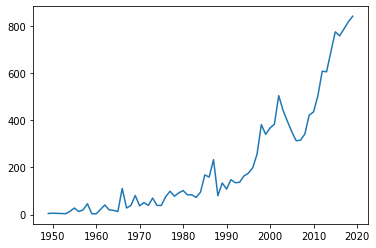

In [37]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])
plt.show()

**Question:** Number of unique theme_ids per calendar year.

In [38]:
themes_per_year = df_sets.groupby("year").agg({'theme_id':pd.Series.nunique})

In [39]:
themes_per_year.rename(columns={'theme_id':'nr_themes'}, inplace=True)
themes_per_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


**Question**: Number of themes released by year on a line chart. Only full calendar years (i.e., excluding 2020 and 2021) have been included. 

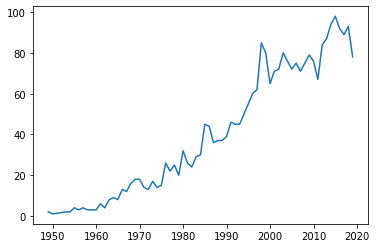

In [43]:
plt.plot(themes_per_year.index[:-2], themes_per_year['nr_themes'][:-2])
plt.show()

### Line Charts with Two Seperate Axes

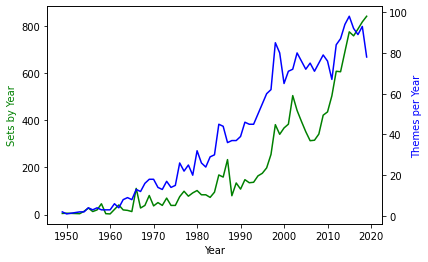

In [55]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # share the same x axis

ax1.set_xlabel("Year")
ax1.set_ylabel("Sets by Year", color='g')
ax2.set_ylabel("Themes per Year", color='b')

ax1.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2], 'g')
ax2.plot(themes_per_year.index[:-2], themes_per_year['nr_themes'][:-2], 'b')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [60]:
avg_num_parts = df_sets.groupby("year").agg({'num_parts':pd.Series.mean})
avg_num_parts

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

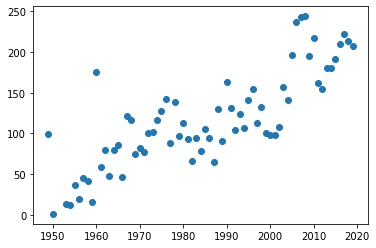

In [62]:
plt.scatter(avg_num_parts.index[:-2], avg_num_parts['num_parts'][:-2])
plt.show()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [79]:
set_theme_count = df_sets["theme_id"].value_counts()

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [69]:
df_themes = pd.read_csv("data/themes.csv")

In [70]:
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [74]:
df_themes[df_themes["name"] == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [75]:
df_sets[df_sets["theme_id"] == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [76]:
df_sets[df_sets["theme_id"] == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [77]:
df_sets[df_sets["theme_id"] == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [78]:
df_sets[df_sets["theme_id"] == 261]

,set_num,name,year,theme_id,num_parts
14630,9748-1,Droid Developer Kit,1999,261,658
14636,9754-1,Dark Side Developers Kit,2000,261,578


### Merging (i.e., Combining) DataFrames based on a Key


In [80]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 'set_count':set_theme_count.values})
set_theme_count

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,210,1
567,455,1
568,383,1
569,245,1


In [83]:
# two dfs merged on a common column
merged_df = pd.merge(set_theme_count, df_themes, on='id')
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

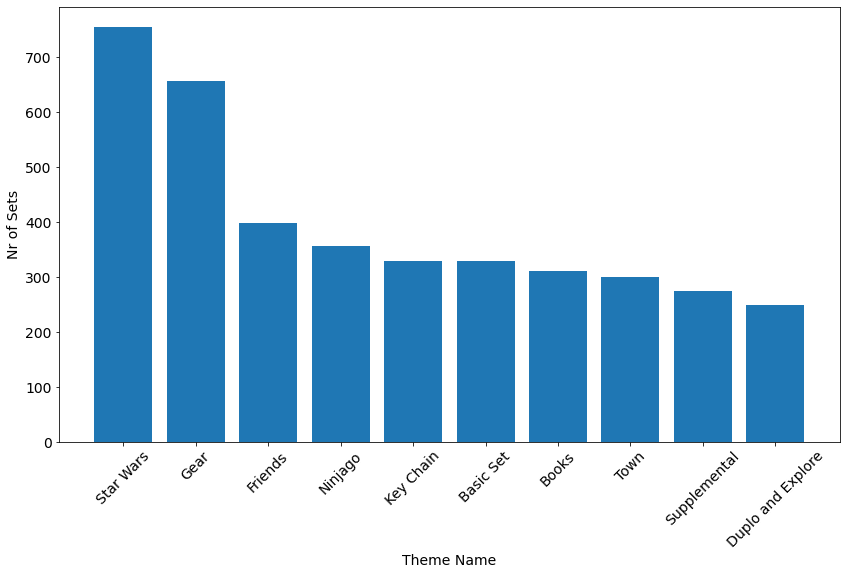

In [84]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_df.name[:10], merged_df.set_count[:10])